In [1]:
!pip install -q umap-learn

In [2]:
!pip install --upgrade scikit-learn umap-learn

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
import umap
from sklearn.cluster import KMeans

sns.set_theme(style="whitegrid")
print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
print("\nLoading and preparing data...")

try:
    df_reviews = pd.read_csv('../data/steam_game_reviews.csv')
    
    df_sample = df_reviews.sample(n=50000, random_state=42)

    texts = df_sample['review'].fillna('').astype(str)
    labels = df_sample['recommendation']

    print(f"Data loaded. Sampled {len(df_sample)} reviews for analysis.")
    print("Preview of the data:")
    print(df_sample[['review', 'recommendation']].head())

except FileNotFoundError:
    print("\nERROR: 'steam_reviews.csv' not found in the 'data' folder.")
    print("Please make sure the dataset is in the correct directory.")


Loading and preparing data...
Data loaded. Sampled 50000 reviews for analysis.
Preview of the data:
                                                   review   recommendation
810207  2020 if this game was 5 bucks it would be grea...  Not Recommended
791265         Unironically most anticipated game of 2024      Recommended
966305  2022 So good.. by far the best minigolf vr gam...      Recommended
886998  2023 The Good:• Beautiful visuals• Satisfying ...      Recommended
401007  2013 Don't starve...for KNOWLEDGE or you'll ge...      Recommended


/var/folders/lh/78jnlbfd28s4bg0kd4ztt0580000gn/T/ipykernel_4904/2374947002.py:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('../data/steam_game_reviews.csv')


In [5]:
print("\nFinding text structure with TF-IDF and UMAP... (This may take a minute)")

# 1. Convert text to numbers using TF-IDF
vec = TfidfVectorizer(max_features=5000, stop_words='english', max_df=0.8, min_df=5)
V = vec.fit_transform(texts)

# 2. Use UMAP to reduce the data to 2 dimensions for plotting
emb_model = umap.UMAP(n_neighbors=25, min_dist=0.1, metric='cosine', random_state=42)
emb = emb_model.fit_transform(V)

print("Text vectorization and UMAP embedding complete.")


Finding text structure with TF-IDF and UMAP... (This may take a minute)


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text vectorization and UMAP embedding complete.



Generating Figure 1: Main Topic Map...


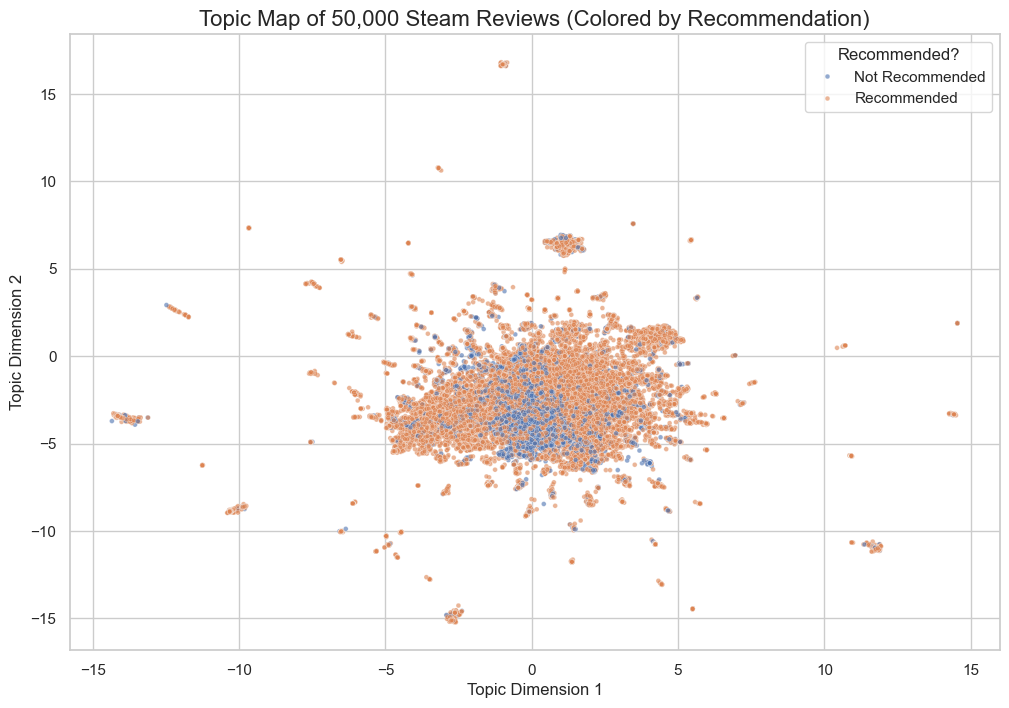

In [6]:
print("\nGenerating Figure 1: Main Topic Map...")
# Create a new DataFrame for easy plotting with Seaborn
plot_df = pd.DataFrame(emb, columns=['u1', 'u2'])
plot_df['recommended'] = labels.values

# --- Figure 1 for the report ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_df, x='u1', y='u2', hue='recommended', s=12, alpha=0.6)
plt.title("Topic Map of 50,000 Steam Reviews (Colored by Recommendation)", fontsize=16)
plt.xlabel("Topic Dimension 1")
plt.ylabel("Topic Dimension 2")
plt.legend(title='Recommended?')
plt.show()


Quantifying structure with KMeans clustering...

--- Top 10 Words for Each Discovered Topic ---
  Topic 1: game, 10, 2023, play, great, 2022, 2021, fun, like, good
  Topic 2: access, early, review, 2022, game, 2020, 2023, good, fun, 2021
  Topic 3: 2023, good, yes, 2021, gg, grind, average, quixote, don, just
  Topic 4: received, product, free, ok, game, 2020, 2023, 2021, yes, 2022
  Topic 5: game, 2021, good, 2023, fun, 2022, like, 2020, 2019, play

Generating Figure 2: Map with Labeled Topic Clusters...


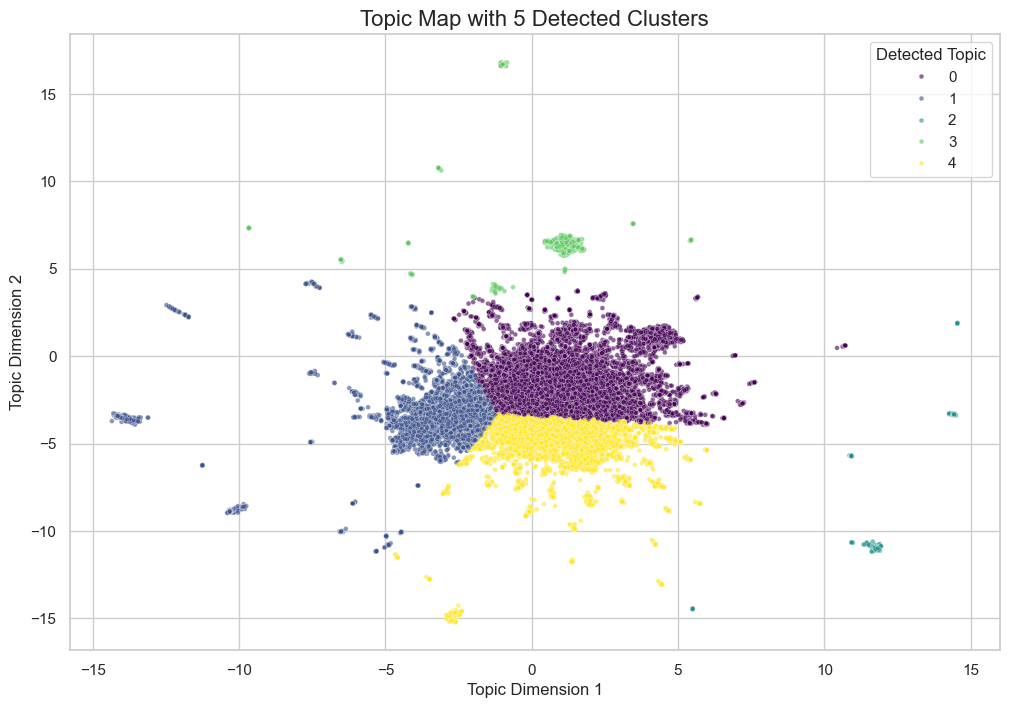



Analysis complete.


In [7]:
print("\nQuantifying structure with KMeans clustering...")
n_topics = 5
kmeans = KMeans(n_clusters=n_topics, random_state=42, n_init='auto')
plot_df['cluster'] = kmeans.fit_predict(plot_df[['u1', 'u2']])

print("\n--- Top 10 Words for Each Discovered Topic ---")
terms = vec.get_feature_names_out()
for i in range(n_topics):
    
    topic_vectors = V[plot_df['cluster'] == i]
    
    mean_vector = np.mean(topic_vectors, axis=0)
    
    top_indices = np.asarray(mean_vector).flatten().argsort()[-10:][::-1]
    top_words = [terms[j] for j in top_indices]
    print(f"  Topic {i+1}: {', '.join(top_words)}")

# --- Figure 2 for the report ---
print("\nGenerating Figure 2: Map with Labeled Topic Clusters...")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_df, x='u1', y='u2', hue='cluster', palette='viridis', s=12, alpha=0.6)
plt.title(f"Topic Map with {n_topics} Detected Clusters", fontsize=16)
plt.xlabel("Topic Dimension 1")
plt.ylabel("Topic Dimension 2")
plt.legend(title='Detected Topic')
plt.show()

print("\n\nAnalysis complete.")